In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#data_folder = "/Users⁩/supertramp⁩/Documents⁩/GitHub⁩/IDS-project⁩/data/";
#data = pd.read_csv(data_folder + "activities.csv")

dataset = pd.read_csv("activities.csv", encoding= 'unicode_escape')
dataset.describe()

,Activity ID,Elapsed Time,Distance,Relative Effort,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,...,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone
count,9.530000e+02,953.000000,953.000000,96.000000,648.000000,37.000000,918.000000,951.000000,951.000000,631.000000,...,2.000000e+00,2.000000,5.100000e+01,1.790000e+02,2.000000,1.0,2.000000,2.0,2.000000,2.000000
mean,1.981421e+09,8393.391396,12.199192,150.520833,52.163004,12.124405,8441.739651,5737.034700,12225.516143,6.667036,...,1.590464e+09,0.115000,5.094433e+06,4.562962e+06,0.005000,5.0,0.340000,16093.0,2.500000,325.699997
std,7.307629e+08,9639.025941,10.852371,146.276953,0.000054,0.314420,9726.374720,5798.610223,10852.393004,3.127369,...,1.226406e+05,0.049497,7.700267e-01,7.002121e+05,0.007071,NaN,0.169706,0.0,3.535534,20.647505
min,9.774250e+08,0.000000,0.000000,0.000000,52.162899,11.339800,0.000000,6.000000,0.000000,0.600000,...,1.590377e+09,0.080000,5.094433e+06,4.034675e+06,0.000000,5.0,0.220000,16093.0,0.000000,311.100006
25%,1.336404e+09,3000.000000,6.420000,41.750000,52.162998,12.247000,3000.000000,2539.000000,6433.444336,4.600000,...,1.590421e+09,0.097500,5.094433e+06,4.034675e+06,0.002500,5.0,0.280000,16093.0,1.250000,318.400002
50%,1.824543e+09,4604.000000,9.610000,122.000000,52.162998,12.247000,4586.000000,3925.000000,9623.000000,5.900000,...,1.590464e+09,0.115000,5.094433e+06,4.034677e+06,0.005000,5.0,0.340000,16093.0,2.500000,325.699997
75%,2.594559e+09,9575.000000,14.480000,180.000000,52.162998,12.247000,9647.000000,6968.500000,14493.562500,8.200000,...,1.590507e+09,0.132500,5.094433e+06,5.519895e+06,0.007500,5.0,0.400000,16093.0,3.750000,332.999992
max,3.521522e+09,101156.000000,141.910000,641.000000,52.163101,12.247000,101156.000000,66187.000000,141913.203100,18.299999,...,1.590551e+09,0.150000,5.094435e+06,5.813859e+06,0.010000,5.0,0.460000,16093.0,5.000000,340.299988


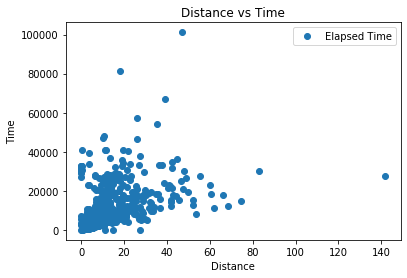

In [15]:
dataset.plot(x='Distance', y='Elapsed Time', style='o')  
plt.title('Distance vs Time')  
plt.xlabel('Distance')  
plt.ylabel('Time')  
plt.show()

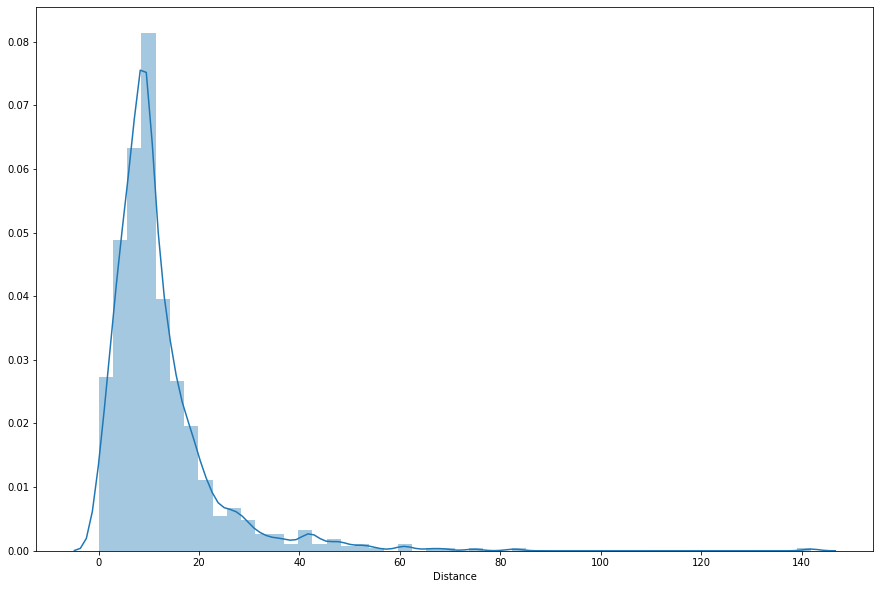

In [16]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Distance'])

In [30]:
dataset = dataset[dataset['Activity Type'].str.match('Run')]
predictors = ['Distance', 'Relative Effort', 'Max Speed', 'Elevation Gain', 'Elevation Loss',
             'Max Grade', 'Average Grade', 'Calories', 'Average Temperature'];

In [32]:
X = dataset[predictors]
y = dataset['Elapsed Time']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X.isna()

,Distance,Relative Effort,Max Speed,Elevation Gain,Elevation Loss,Max Grade,Average Grade,Calories,Average Temperature
0,False,True,False,False,True,False,False,False,True
1,False,True,False,False,True,False,False,True,True
3,False,True,False,False,True,False,False,True,True
4,False,True,False,False,True,False,False,True,True
5,False,True,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
947,False,True,False,False,False,False,False,False,True
948,False,True,False,False,False,False,False,False,True
949,False,True,False,False,False,False,False,False,True
950,False,True,False,False,False,False,False,False,True


In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').